# 📌 데이터 분석 포트폴리오: 확장된 테일러 준칙 분석 및 최적 기준금리 예측  

## 🔹 프로젝트 개요  
본 프로젝트는 거시경제 분석 연구의 일환으로,  
기준금리 결정 모델인 **테일러 준칙(Taylor Rule)** 을 확장하여 한국 경제에 적합한 최적 기준금리를 추정하는 작업입니다.  

데이터 분석 기술을 활용하여 **경제 모델을 검증하고, 최적의 기준금리를 예측하며,  
정책적 인사이트를 도출** 하는 과정 전반을 다루고 있습니다.  
특히, **통계적 방법론(OLS, 2SLS, IV-GMM) 및 시각화 기법** 을 적용하여 신뢰성 높은 분석을 수행하였습니다.  

## 🔹 핵심 활용 기술  

✅ **데이터 수집 및 전처리**  
- 한국은행 및 국제 금융 데이터 활용 (경제 변수 수집 및 정리)  
- 시계열 데이터 처리 및 결측치 보완  

✅ **통계 및 머신러닝 기법 적용**  
- 회귀 분석 (OLS, 2SLS, IV-GMM)  
- 도구변수(Instrumental Variables) 최적화 및 다중공선성 검토  
- 경제 데이터 기반의 시뮬레이션 수행  

✅ **데이터 시각화 및 인사이트 도출**  
- **Matplotlib, Seaborn, Plotly** 를 활용한 경제 변수 시각화  
- 예측된 기준금리 vs 실제 기준금리 비교 그래프 작성  
- 변수별 경제적 의미 분석 및 정책적 시사점 도출  

---

## 🔹 프로젝트 상세 내용  
### 📌 1. 연구 배경 및 목표  
금융정책 결정의 핵심 도구 중 하나인 테일러 준칙은 기본적으로 다음과 같이 표현됩니다.

\[
i_t = r^* + \pi_t + \alpha (\pi_t - \pi^*) + \beta y_t
\]

하지만, 기존 테일러 준칙은 **한국 경제의 구조적 특성을 충분히 반영하지 못하는 한계점** 이 있습니다.  
따라서 본 프로젝트에서는 **추가적인 거시경제 변수를 고려하여 확장된 테일러 준칙 모델을 구축** 하고,  
이를 통해 **더욱 현실적인 최적 기준금리 모델을 제시** 하는 것이 목표입니다.  

---

### 📌 2. 데이터 및 변수 선정  
#### 📊 데이터 출처  
- 한국은행 경제통계시스템 (ECOS)  
- IMF, OECD, FRED 등 글로벌 경제 데이터  
- KRX(한국거래소) 및 국고채 금리 데이터  

#### 🔍 주요 분석 변수  
기본적인 인플레이션과 산출갭(Output gap) 외에도 다음과 같은 변수를 추가하여 모델을 확장합니다.  
- **주택가격지수 변동률** (Housing price index growth)  
- **수입물가 변동률** (Import price index growth)  
- **M2 증가율** (Money supply growth)  
- **국채금리 스프레드** (Government bond spread)  
- **미국 GDP 갭** (US GDP gap)  
- **미국 연방기금금리** (US Fed Rate)  
- **생산자물가지수 변동률** (Producer price index growth)  

---

### 📌 3. 분석 방법 및 모델링  
**IV-GMM (Instrumental Variables Generalized Method of Moments, 도구변수 GMM)**  

#### 🔹 도구변수 최적화  
- 다중공선성(VIF) 및 독립성 테스트  
- 최적의 도구변수 선택을 통한 GMM 적용  

#### 🔹 금리 예측 시뮬레이션  
- 실제 기준금리와 모델 기반 예측 금리 비교  
- 정책적 대응 분석  

---

### 📌 4. 결과 분석 및 시각화  
#### 📊 시각화 기법 활용  
- **Matplotlib & Seaborn**: 데이터 분포 및 변수 간 관계 시각화  
- **Plotly & Interactive Charts**: 동적 시각화를 활용한 금리 변화 추이 분석  

#### 📈 주요 결과  
- 확장된 테일러 준칙이 실제 금리 결정에 미치는 영향 분석  
- 기존 모델 대비 확장 모델의 설명력 개선 여부 평가  
- 변수별 경제적 의미 해석  

---

## 🔹 기대 효과 및 활용 방안  
### ✅ 데이터 분석가로서의 차별화된 강점  
이 프로젝트는 **거시경제 데이터 분석을 통한 정책적 인사이트 도출** 이라는  
실제 경제 분석 및 정책 결정에 활용할 수 있는 **실무형 데이터 분석 역량** 을 강조하고 있습니다.  

이를 통해 다음과 같은 강점을 어필할 수 있습니다.  

📌 **데이터 기반 문제 해결 능력**: 거시경제 데이터를 정량적으로 분석하여 정책적 시사점 도출  
📌 **다양한 회귀 분석 기법 활용**: IV-GMM, 2SLS 등 심화된 통계 기법 적용 경험 보유  
📌 **시각화 및 데이터 커뮤니케이션 능력**: 복잡한 경제 데이터를 직관적으로 전달하는 역량  

In [1]:
import importlib.util
import gspread as gs
import pandas as pd
import numpy as np

import statsmodels.api as sm
from itertools import combinations
from linearmodels.iv import IVGMM

import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter

# 📌 config.py의 경로 설정
config_path = "C:/Users/best0/CCIRecommendBackend/config.py"

# 📌 importlib을 이용하여 동적으로 config.py 로드
spec = importlib.util.spec_from_file_location("config", config_path)
config = importlib.util.module_from_spec(spec)
spec.loader.exec_module(config)

# ✅ Google Drive 설정 값 읽기
gs_account = config.GoogleDriveConfig.SERVICE_ACCOUNT_FILE

# 📌 gspread를 이용한 구글 드라이브 연결
gc = gs.service_account(filename=gs_account)

# 📌 스프레드시트 데이터 가져오기
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/169bXhTYsE9FeFz4F6K94iguCIgxMLMt1mZ21uLx8SRU/edit?usp=sharing'
spreadsheet = gc.open_by_url(spreadsheet_url)
quarterly_data_worksheet = spreadsheet.worksheet("quarterly_data")
monthly_data_worksheet = spreadsheet.worksheet("monthly_data")

quarterly_data = quarterly_data_worksheet.get_all_values()
monthly_data = monthly_data_worksheet.get_all_values()

quarterly_columns = quarterly_data[0]
monthly_columns = monthly_data[0]

# 데이터프레임 변환
df_quarterly = pd.DataFrame(quarterly_data[1:], columns=quarterly_columns)
df_monthly = pd.DataFrame(monthly_data[1:], columns=monthly_columns)

monthly_column_mapping = {
    'year/month': 'year_month',
    '주택매매가격지수_총지수': 'housing_price_index_total',
    '주택매매가격지수_총지수_서울': 'housing_price_index_total_seoul',
    '주택매매가격지수_아파트': 'housing_price_index_apartment',
    '주택매매가격지수_아파트_서울': 'housing_price_index_apartment_seoul',
    '주택전세가격지수_총지수': 'rent_price_index_total',
    '주택전세가격지수_총지수_서울': 'rent_price_index_total_seoul',
    '주택전세가격지수_아파트': 'rent_price_index_apartment',
    '주택전세가격지수_아파트_서울': 'rent_price_index_apartment_seoul',
    '미국_기준금리': 'us_fed_rate',
    'M2 상품별 구성내역_평잔_계절조정계열_십억원': 'm2_money_supply_seasonally_adjusted'
}

df_monthly.rename(columns=monthly_column_mapping, inplace=True)

# Replace empty strings with NaN
df_monthly.replace('', np.nan, inplace=True)

# Convert all columns except 'year_month' to float
df_monthly[df_monthly.columns.difference(['year_month'])] = df_monthly[df_monthly.columns.difference(['year_month'])].apply(pd.to_numeric, errors='coerce')

# Convert 'year_month' to datetime format for proper handling
df_monthly['year_month'] = pd.to_datetime(df_monthly['year_month'], format='%Y/%m')


# Set 'year_month' as index for resampling
df_monthly.set_index('year_month', inplace=True)

# Resample data by quarter and take the average (you can also use 'sum' if needed)
quarterly_data = df_monthly.resample('QE').mean()

# Reset index to get 'year_month' back as a column
quarterly_data.reset_index(inplace=True)

# 컬럼명 매핑 (한글 → 영어)
quaterly_column_mapping = {
    "연도": "year",
    "분기": "quarter",
    "콜금리_무담보 콜금리_전체": "callRate",
    "소비자물가지수_전체": "CPI",
    "소비자물가지수_식료품및에너지제외": "CPI_Ex_Food_Energy",
    "국내총생산_실질_계절조정_전기비": "GDP_Real_Seasonal_QoQ",
    "국내총생산_실질_원계열_전년동기비": "GDP_Real_NSA_YoY",
    "GDP_계절조정_실질": "GDP_Real_Seasonal",
    "수입물가지수_기본분류_총지수_원화기준": "importCPI_KRW",
    "수입물가지수_기본분류_총지수_달러기준": "importCPI_USD",
    "생산자물가지수_기본분류_총지수": "PPI",
    "국고채_1년": "GovBond_1Y",
    "국고채_2년": "GovBond_2Y",
    "국고채_3년": "GovBond_3Y",
    "국고채_5년": "GovBond_5Y",
    "국고채_10년": "GovBond_10Y",
    "국고채_20년": "GovBond_20Y",
    "국고채_30년": "GovBond_30Y",
    "국고채_50년": "GovBond_50Y",
    "미국_GDP_USD_OECD": "US_GDP_USD_OECD",
    "미국_GDP_index_BEA": "US_GDP_index_BEA",
    "미국_CPI_OECD_2015": "US_CPI_OECD_2015"
}


df_quarterly.rename(columns=quaterly_column_mapping, inplace=True)

df_quarterly['quarterly'] = df_quarterly['year'].astype(str) + ' Q' + df_quarterly['quarter'].astype(str)

df_quarterly['quarter'] = df_quarterly['quarter'].astype(int)
# 분기별 마지막 날짜 생성 함수
def get_quarter_end_date(row):
    if row['quarter'] == 1:
        return pd.Timestamp(f"{row['year']}-03-31")
    elif row['quarter'] == 2:
        return pd.Timestamp(f"{row['year']}-06-30")
    elif row['quarter'] == 3:
        return pd.Timestamp(f"{row['year']}-09-30")
    elif row['quarter'] == 4:
        return pd.Timestamp(f"{row['year']}-12-31")

# 'quarter_end_date' 컬럼 생성
df_quarterly['date'] = df_quarterly.apply(get_quarter_end_date, axis=1)

# 병합 수행
df = pd.merge(df_quarterly, quarterly_data, left_on='date', right_on='year_month', how='inner')

df.set_index('date', inplace=True)

target_columns = ['callRate', 
                  'CPI', 
                  'CPI_Ex_Food_Energy', 
                  'GDP_Real_Seasonal', 
                  'US_GDP_USD_OECD', 
                  'm2_money_supply_seasonally_adjusted', 
                  'PPI', 
                  'GovBond_5Y', 
                  'GovBond_3Y', 
                  'importCPI_KRW', 
                  'us_fed_rate',
                  'housing_price_index_apartment_seoul'
                  ]

df[target_columns] = df[target_columns].apply(pd.to_numeric, errors='coerce')


# 독립변수 생성

# 1. 인플레이션율
df['inf'] = (np.log(df['CPI']) - np.log(df['CPI'].shift(4))) * 100
df['inf_ex_food_energy'] = (np.log(df['CPI_Ex_Food_Energy']) - np.log(df['CPI_Ex_Food_Energy'].shift(4))) * 100

# 목표 인플레이션율은 날짜와 관계 없이 모두 2%라고 가정함
df['inf_gap'] = df['inf'] - 2.0

# 2. GDP Gap : log 변환 후 HP 필터를 적용하여 cycle과 trend를 분리하여 trend를 잠재GDP로 사용
# 2-1. 한국 GDP Gap
# 2-1-1. 한국 GDP log 변환
df['ln_GDP_Real_Seasonal'] = np.log(df['GDP_Real_Seasonal'])

# 2-1-2. 한국 GDP Gap 계산 (HP 필터 적용 (λ = 1600은 분기별 데이터 기준))
cycle, trend = hpfilter(df["ln_GDP_Real_Seasonal"], lamb=1600)
df["kr_GDP_Potential"] = trend
df['kr_GDP_Gap'] = (df['ln_GDP_Real_Seasonal'] - df['kr_GDP_Potential']) / df['kr_GDP_Potential'] * 100

# 3. 한국 주택가격지수 갭(서울 아파트 지수)
df['housing_price_index_apartment_seoul_g'] = (df['housing_price_index_apartment_seoul'] - df['housing_price_index_apartment_seoul'].shift(4)) * 100

# housing price gap
cycle, trend = hpfilter(np.log(df["housing_price_index_apartment_seoul"]), lamb=1600)
df["housing_price_potential"] = trend
df['housing_price_gap'] = (np.log(df['housing_price_index_apartment_seoul']) - 
                                   df['housing_price_potential']) * 100

# 도구변수 생성
# 1. 한국 M2 통화량 전년동기대비 변화율
df['kr_m2_g'] = (df['m2_money_supply_seasonally_adjusted'] - df['CPI_Ex_Food_Energy'].shift(4)) * 100

# 2. 한국 생산자물가지수 변화율
df['kr_ppi_g'] = (df['PPI'] - df['PPI'].shift(4)) * 100

# 3. 한국 국고채 스프레드
df['kr_GovBond_spread'] = df['GovBond_5Y'] - df['GovBond_3Y']

# 4. 한국 수입물가지수(원화기준) 변화율
df['kr_importCPI_KRW_g'] = (df['importCPI_KRW'] - df['importCPI_KRW'].shift(4)) * 100

# 5. 미국 GDP
# 5-1. 미국 GDP log 변환
df['ln_us_GDP'] = np.log(df['US_GDP_USD_OECD'])

# 5-2. 미국 GDP Gap 계산 (HP 필터 적용 (λ = 1600은 분기별 데이터 기준))
cycle, trend = hpfilter(df["ln_us_GDP"], lamb=1600)
df["us_GDP_Potential"] = trend
df['us_GDP_Gap'] = (df['ln_us_GDP'] - df['us_GDP_Potential']) / df['us_GDP_Potential'] * 100

# 6. 미연준금리
# df['us_fed_rate']


# Create lagged and lead variables for the model
lags = range(1, 5)
for lag in lags:
    df.loc[:, f'callRate_lag{lag}'] = df['callRate'].shift(lag)
    df.loc[:, f'inf_lag{lag}'] = df['inf'].shift(lag)
    df.loc[:, f'inf_gap_lag{lag}'] = df['inf_gap'].shift(lag)
    df.loc[:, f'inf_ex_food_energy_lag{lag}'] = df['inf_ex_food_energy'].shift(lag)
    df.loc[:, f'kr_GDP_Gap_lag{lag}'] = df['kr_GDP_Gap'].shift(lag)
    df.loc[:, f'housing_price_gap_lag{lag}'] = df['housing_price_gap'].shift(lag)
    
    df.loc[:, f'kr_m2_g_lag{lag}'] = df['kr_m2_g'].shift(lag)
    df.loc[:, f'kr_ppi_g_lag{lag}'] = df['kr_ppi_g'].shift(lag)
    df.loc[:, f'kr_GovBond_spread_lag{lag}'] = df['kr_GovBond_spread'].shift(lag)
    df.loc[:, f'kr_importCPI_KRW_g_lag{lag}'] = df['kr_importCPI_KRW_g'].shift(lag)
    df.loc[:, f'us_fed_rate_lag{lag}'] = df['us_fed_rate'].shift(lag)
    df.loc[:, f'us_GDP_Gap_lag{lag}'] = df['us_GDP_Gap'].shift(lag)


df_filtered = df.loc['1998-03-31':]


# 종속 변수 (y)
y = df_filtered['callRate'][1:-4]



# 외생 설명 변수 (X)
X = df_filtered[['us_fed_rate', 'us_GDP_Gap', 'housing_price_gap', 'kr_m2_g', 'kr_ppi_g', 'kr_importCPI_KRW_g']].iloc[1:-4]
X = sm.add_constant(X)  # 상수항 추가

# 내생 변수 (endog)
endog = pd.concat([
    ((1 - df_filtered['callRate'].shift(1)[1:-4]) * (df_filtered['inf_gap'].shift(-4)[1:-4] + df_filtered['kr_GDP_Gap'].shift(-1)[1:-4])).rename('forward_looking_term'),
], axis=1)


# 도구 변수 (Z) - 상수항 제외
Z = df_filtered[[
    'callRate_lag1', 
    'callRate_lag2', 
    'callRate_lag3', 
    'callRate_lag4',

    'inf_lag1',
    'inf_lag2',
    'inf_lag3',
    'inf_lag4',

    # 'inf_gap_lag1',
    # 'inf_gap_lag2',
    # 'inf_gap_lag3',
    # 'inf_gap_lag4',

    # 'inf_ex_food_energy_lag1',
    # 'inf_ex_food_energy_lag2',
    # 'inf_ex_food_energy_lag3',
    # 'inf_ex_food_energy_lag4',

    'kr_GDP_Gap_lag1',
    'kr_GDP_Gap_lag2',
    'kr_GDP_Gap_lag3',
    'kr_GDP_Gap_lag4',

    'kr_m2_g_lag1', 
    'kr_m2_g_lag2', 
    'kr_m2_g_lag3', 
    'kr_m2_g_lag4',

    'housing_price_gap_lag1',
    'housing_price_gap_lag2',
    'housing_price_gap_lag3',
    'housing_price_gap_lag4',

    'kr_ppi_g_lag1',
    'kr_ppi_g_lag2',
    'kr_ppi_g_lag3',
    'kr_ppi_g_lag4',

    # 'kr_GovBond_spread_lag1',
    # 'kr_GovBond_spread_lag2',
    # 'kr_GovBond_spread_lag3',
    # 'kr_GovBond_spread_lag4',

    'kr_importCPI_KRW_g_lag1',
    'kr_importCPI_KRW_g_lag2',
    'kr_importCPI_KRW_g_lag3',
    'kr_importCPI_KRW_g_lag4',

    'us_fed_rate_lag1',
    'us_fed_rate_lag2',
    'us_fed_rate_lag3',
    'us_fed_rate_lag4',

    'us_GDP_Gap_lag1',
    'us_GDP_Gap_lag2',
    'us_GDP_Gap_lag3',
    'us_GDP_Gap_lag4'
    ]].iloc[1:-4]

# 4️⃣ 모델 실행
model = IVGMM(y, X, endog=endog, instruments=Z)
results = model.fit()

print(results.summary)

                          IV-GMM Estimation Summary                           
Dep. Variable:               callRate   R-squared:                      0.8732
Estimator:                     IV-GMM   Adj. R-squared:                 0.8638
No. Observations:                 103   F-statistic:                    1609.2
Date:                Wed, Mar 05 2025   P-value (F-stat)                0.0000
Time:                        00:08:20   Distribution:                  chi2(7)
Cov. Estimator:                robust                                         
                                                                              
                                  Parameter Estimates                                   
                      Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------------
const                    4.4200     0.1673     26.412     0.0000      4.0920      4.7480
us_fed_rate 

# 한국 통화정책의 테일러 룰 GMM 추정 분석

## 모델 성능 지표

- **R-squared: 0.8732 (87.32%)**: 모델이 기준금리 변동의 약 87%를 설명
- **Adj. R-squared: 0.8638**: 높은 설명력 유지
- **F-statistic: 1609.2, P-value(F-stat): 0.0000**: 모델이 통계적으로 매우 유의함
- **No. Observations: 103**: 103개 분기 데이터로 분석

## 파라미터별 경제학적 의미 해석

### 1. 상수항 (const)
- **계수: 4.4200, P-value: 0.0000**
- **의미**: 다른 모든 변수가 0일 때의 기준금리 수준으로, 한국의 자연 기준금리(natural rate)가 약 4.42% 수준임을 시사

### 2. 미국 연준 기준금리 (us_fed_rate)
- **계수: 0.5013, P-value: 0.0000**
- **의미**: 미 연준 금리가 1%p 상승할 때, 한국 기준금리는 약 0.5%p 상승하는 경향
- 이는 한국 통화정책이 글로벌 금융환경, 특히 미국의 통화정책에 상당한 영향을 받음을 의미

### 3. 미국 GDP 갭 (us_GDP_Gap)
- **계수: 1.5132, P-value: 0.0027**
- **의미**: 미국 경제가 잠재GDP 대비 1%p 과열될 때, 한국은행은 기준금리를 약 1.51%p 인상하는 경향
- 한국 통화정책이 미국 경기 상황에 매우 민감하게 반응함을 시사

### 4. 주택가격 갭 (housing_price_gap)
- **계수: 0.1078, P-value: 0.0000**
- **의미**: 주택가격이 잠재적 수준을 1%p 초과할 때, 한국은행은 기준금리를 약 0.11%p 인상
- 한국은행이 부동산 시장 안정을 통화정책의 중요 목표로 삼고 있음을 확인

### 5. 통화량 성장률 (kr_m2_g)
- **계수: -1.293e-08, P-value: 0.0000**
- **의미**: 통화량 증가에 대해 한국은행이 금리를 낮추는 경향이 있으나, 계수의 절대값이 매우 작아 실질적 영향은 미미

### 6. 생산자물가 상승률 (kr_ppi_g)
- **계수: 0.0015, P-value: 0.0001**
- **의미**: 생산자물가가 상승할 때 한국은행은 금리를 인상하는 경향
- 생산단계의 물가압력에 대응하는 선제적 통화정책을 시행함을 의미

### 7. 수입물가 상승률 (kr_importCPI_KRW_g)
- **계수: -0.0003, P-value: 0.0006**
- **의미**: 수입물가 상승시 한국은행이 금리를 소폭 인하하는 경향
- 수입물가 상승이 외부 충격으로 인한 경기 둔화 신호로 해석될 수 있음을 시사

### 8. 선제적 통화정책 요소 (forward_looking_term)
- **계수: 0.1657, P-value: 0.0000**
- **의미**: 미래 인플레이션과 경기 전망을 고려한 선제적 통화정책 지표
- 양의 계수는 한국은행이 미래지향적 통화정책을 실시함을 보여줌
- 예상 인플레이션과 GDP 갭이 상승할 것으로 예상될 때 금리를 인상하는 성향을 의미

## 통화정책 종합 해석

### 1. 글로벌 영향력의 우위
- 미국 연준 금리(0.50)와 미국 GDP 갭(1.51)이 한국 기준금리 결정에 매우 강한 영향을 미침
- 이는 한국 경제의 개방성과 글로벌 금융시장과의 높은 통합성을 반영

### 2. 부동산 시장 고려
- 주택가격 갭(0.11)에 대한 유의한 양의 반응은 한국은행이 부동산 시장 안정을 중요시함을 보여줌
- 부동산 가격이 과열될 때 금리 인상으로 대응하는 정책 패턴을 확인

### 3. 물가안정 목표
- 생산자물가(0.0015)에 대한 양의 반응은 물가안정 목표를 추구하는 중앙은행의 기본 임무를 반영
- 다만 수입물가(-0.0003)에 대한 음의 반응은 외부 충격에 대한 경기 대응적 측면을 보여줌

### 4. 선제적 정책 기조
- forward_looking_term(0.17)의 유의한 양의 계수는 한국은행이 미래 경제상황을 예측하고 선제적으로 대응하는 정책 기조를 가짐을 시사
- 이는 현대 중앙은행의 선제적(forward-looking) 통화정책 패러다임과 일치

### 5. 복합적 목표 체계
- 모델 전체 결과는 한국은행이 단순한 인플레이션 타겟팅을 넘어 금융안정, 경제성장, 글로벌 요인 등을 복합적으로 고려하는 통화정책 체계를 운영함을 시사

## 시사점 및 결론

1. **해외 의존성**: 한국 통화정책은 국내 요인뿐만 아니라 해외 요인, 특히 미국의 통화정책과 경기 상황에 크게 의존함
   
2. **금융안정 중시**: 주택가격에 대한 유의한 반응은 한국은행이 금융안정, 특히 부동산 시장 안정을 중요시함을 보여줌

3. **정책 독립성의 제한**: 미국 변수들의 강한 영향력은 한국은행의 정책 독립성이 일정 부분 제한될 수 있음을 시사

4. **선제적 정책 운용**: 미래 경제상황을 고려한 선제적 통화정책 운용은 한국은행의 현대적 통화정책 프레임워크를 반영

5. **복합 목표 추구**: 결과적으로 한국은행은 물가안정이라는 전통적 목표뿐만 아니라 금융안정, 경기변동 완화, 글로벌 충격 대응 등 복합적인 목표를 추구함

이러한 분석은 한국은행의 통화정책 결정 메커니즘을 이해하고 예측하는 데 중요한 통찰을 제공하며, 향후 정책 방향성을 예측하는 데 유용한 기반이 될 수 있습니다.

모델 성능 지표:
MSE: 0.6292
RMSE: 0.7932
결정계수(R-squared): 0.8732


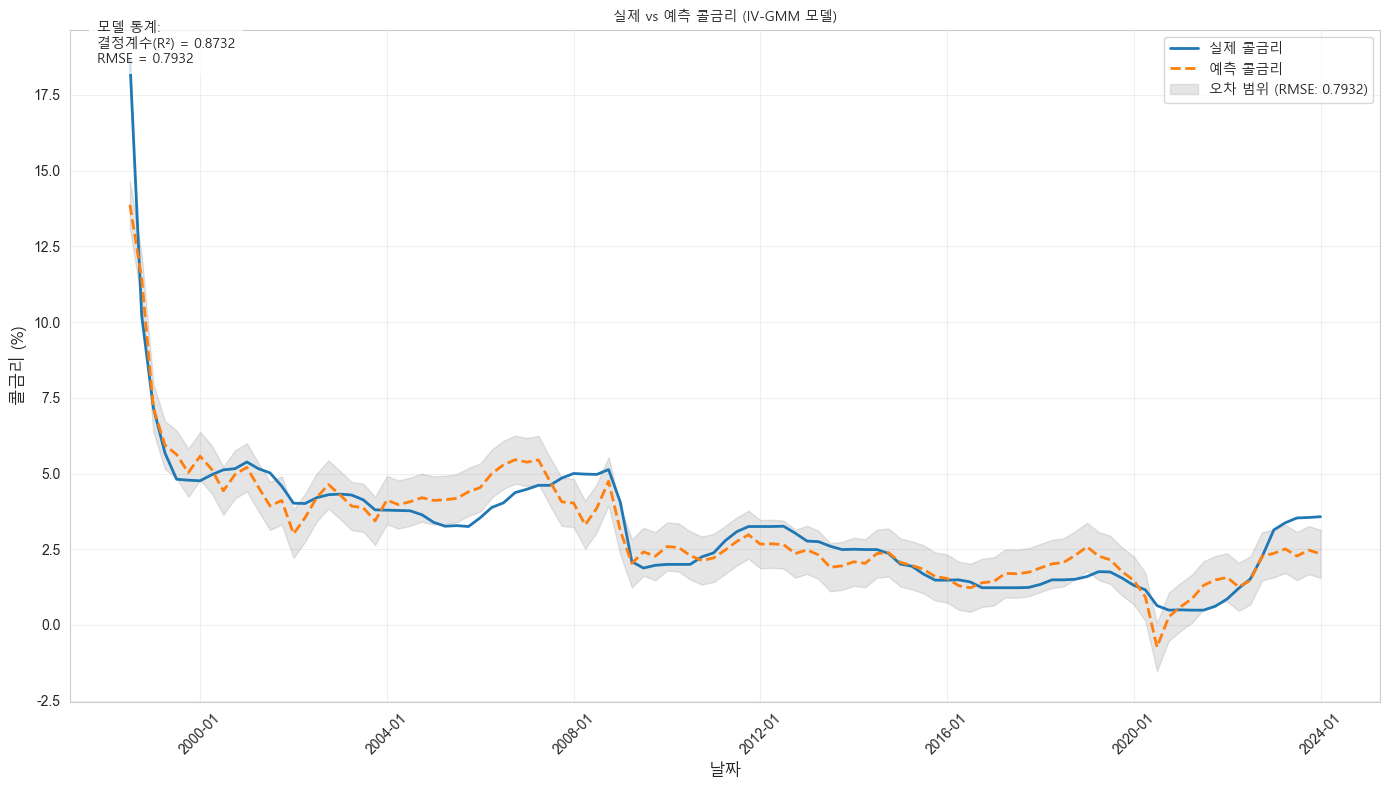

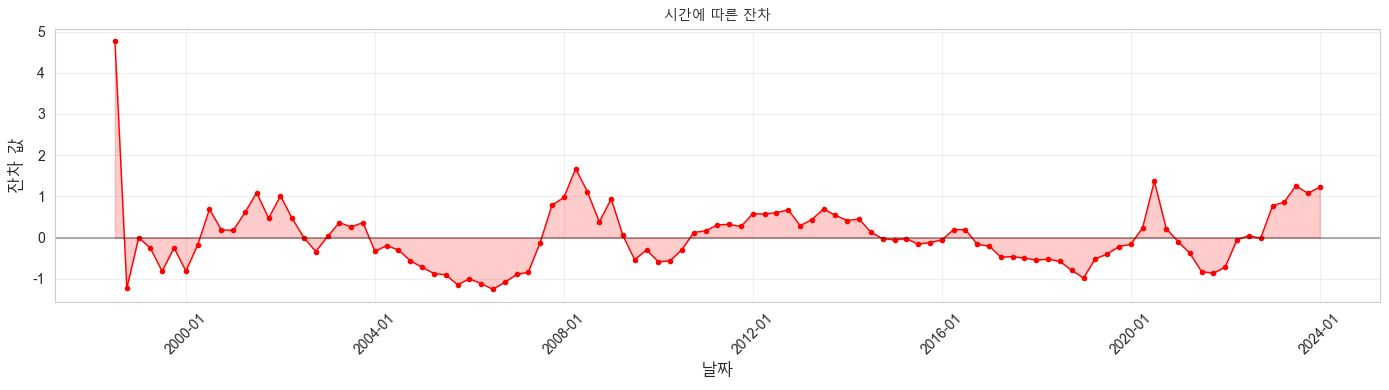

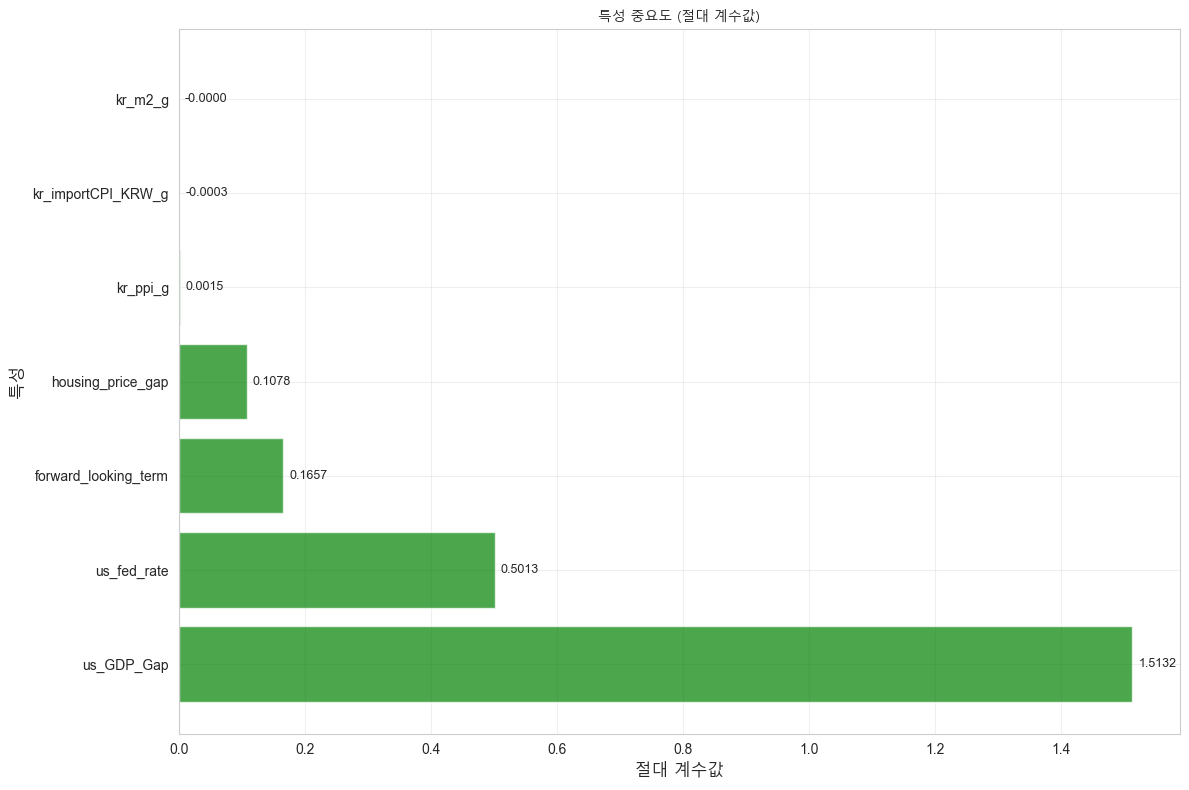

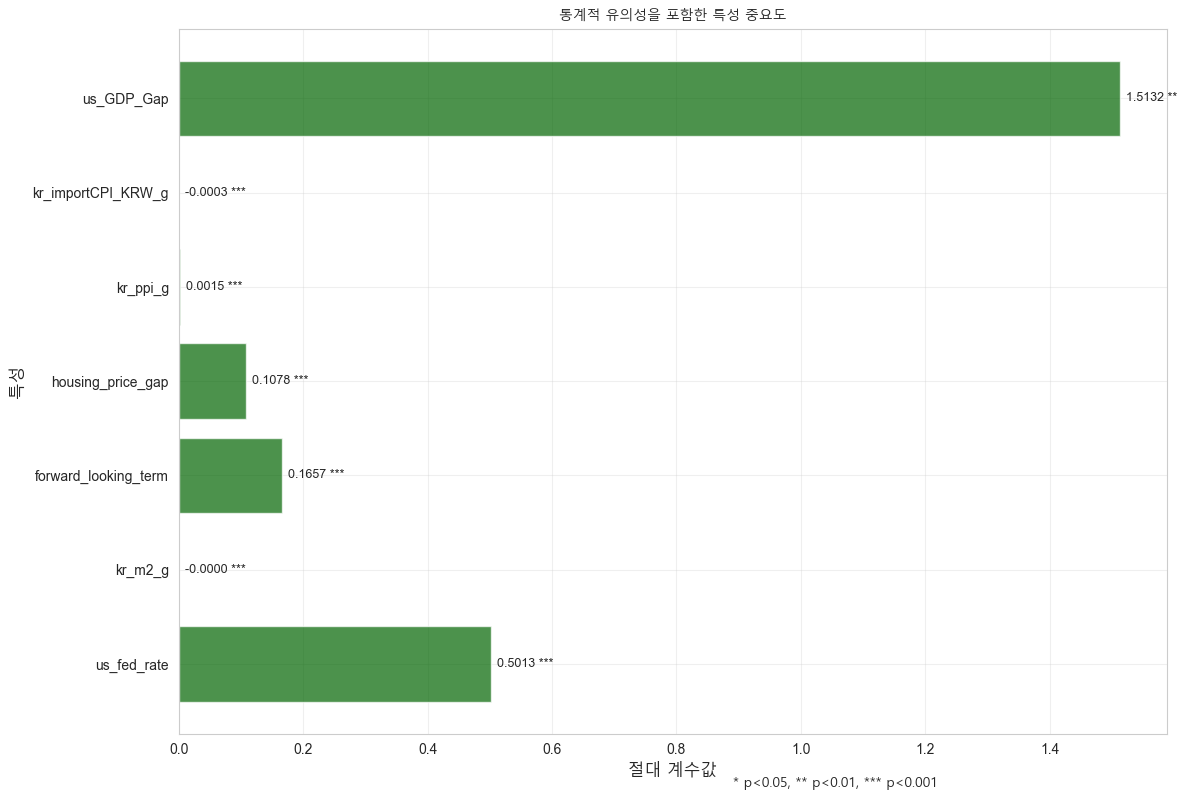

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import statsmodels.api as sm
from linearmodels.iv import IVGMM
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# 한글 폰트 설정 - IPython/Jupyter 환경에서의 문제 해결
import matplotlib.font_manager as fm
import matplotlib as mpl
import platform
import os

# 시스템 확인
system = platform.system()

# 폰트 직접 지정 방식 (가장 확실한 방법)
if system == 'Windows':
    if os.path.exists(r'C:\Windows\Fonts\malgun.ttf'):
        font_path = r'C:\Windows\Fonts\malgun.ttf'
    elif os.path.exists(r'C:\Windows\Fonts\gulim.ttc'):
        font_path = r'C:\Windows\Fonts\gulim.ttc'
    else:
        font_path = None
elif system == 'Darwin':  # macOS
    if os.path.exists('/System/Library/Fonts/AppleGothic.ttf'):
        font_path = '/System/Library/Fonts/AppleGothic.ttf'
    else:
        font_path = None
else:  # Linux
    font_candidates = [
        '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
        '/usr/share/fonts/nanum/NanumGothic.ttf'
    ]
    font_path = next((f for f in font_candidates if os.path.exists(f)), None)

# 폰트 등록 및 설정
if font_path:
    # print(f"사용할 폰트 경로: {font_path}")
    # 폰트 등록
    font_name = fm.FontProperties(fname=font_path).get_name()
    mpl.font_manager.fontManager.addfont(font_path)
    
    # 글꼴 설정
    plt.rcParams['font.family'] = font_name
else:
    print("적절한 한글 폰트를 찾을 수 없습니다. matplotlib 한글 폰트 패키지를 설치해보세요.")
    try:
        # matplotlib-inline 패키지 설치되어 있다면 사용
        import matplotlib_inline
        print("matplotlib-inline 패키지가 설치되어 있습니다. 이 설정을 시도합니다.")
        mpl.rc('font', family='NanumGothic')
    except ImportError:
        # 대체 방법: 기본 폰트 중에서 최대한 한글을 지원하는 것 사용
        mpl.rc('font', family='DejaVu Sans')

# 추가 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# matplotlib 폰트 전체에 적용될 기본 폰트 설정 (모든 요소에 적용)
import matplotlib.pyplot as plt

# 모든 그래프 요소에 대해 폰트 설정을 명시적으로 적용하는 함수
def set_korean_fonts_for_plot():
    """모든 그래프 요소에 한글 폰트를 적용합니다."""
    plt.rcParams['font.family'] = 'sans-serif'
    if font_path:
        font_prop = fm.FontProperties(fname=font_path)
        plt.title('한글 테스트', fontproperties=font_prop)
        plt.xlabel('한글 테스트', fontproperties=font_prop)
        plt.ylabel('한글 테스트', fontproperties=font_prop)
        return font_prop
    return None


# 한글 폰트 객체 생성 (이후 모든 그래프에서 직접 지정 가능)
if font_path:
    korean_font = fm.FontProperties(fname=font_path)
else:
    korean_font = None

# 모델 피팅 후, 예측값 생성

# 먼저, 모델에 사용된 데이터와 동일한 데이터를 사용하는지 확인
y_actual = y

# 모델 결과를 사용하여 예측 생성
# 피팅된 파라미터를 사용하여 예측 수행
params = results.params
X_with_endog = X.copy()
X_with_endog[['forward_looking_term']] = endog[['forward_looking_term']]

# 예측값 계산
y_pred = np.sum(X_with_endog.values * params.values, axis=1)

# 시각화를 위한 DataFrame 생성 - 모든 배열의 길이가 동일한지 확인
# 참고: 업데이트된 코드에서 데이터는 [1:-4]로 슬라이싱되므로 인덱스 조정 필요
pred_df = pd.DataFrame({
    'Date': df_filtered.index[1:-4],  # y에 사용된 슬라이스와 일치
    'Actual': y_actual.values,
    'Predicted': y_pred
})

# 오차 지표 계산
mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_actual, y_pred)

print(f"모델 성능 지표:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"결정계수(R-squared): {r2:.4f}")

# 플롯 스타일 설정
plt.figure(figsize=(14, 8))
sns.set_style('whitegrid')

# 실제 vs 예측값 플롯
plt.plot(pred_df['Date'], pred_df['Actual'], label='실제 콜금리', linewidth=2)
plt.plot(pred_df['Date'], pred_df['Predicted'], label='예측 콜금리', linewidth=2, linestyle='--')

# 오차 범위 추가
plt.fill_between(
    pred_df['Date'],
    pred_df['Predicted'] - rmse,
    pred_df['Predicted'] + rmse,
    alpha=0.2,
    color='gray',
    label=f'오차 범위 (RMSE: {rmse:.4f})'
)

# 잔차 계산 및 플롯
pred_df['Residuals'] = pred_df['Actual'] - pred_df['Predicted']

# 제목 및 레이블 추가 (폰트 속성 직접 지정)
plt.title('실제 vs 예측 콜금리 (IV-GMM 모델)', fontsize=16, fontproperties=korean_font)
plt.xlabel('날짜', fontsize=12, fontproperties=korean_font)
plt.ylabel('콜금리 (%)', fontsize=12, fontproperties=korean_font)

# 범례에도 폰트 지정
legend = plt.legend(fontsize=10)
for text in legend.get_texts():
    text.set_fontproperties(korean_font)
    
plt.grid(True, alpha=0.3)

# X축 날짜 형식 지정
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# 모델 통계 주석 추가 (폰트 속성 직접 지정)
stats_text = f"모델 통계:\n결정계수(R²) = {r2:.4f}\nRMSE = {rmse:.4f}"
plt.annotate(stats_text, xy=(0.02, 0.95), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8),
             fontsize=10, fontproperties=korean_font)

plt.tight_layout()

# 잔차를 위한 서브플롯 생성
plt.figure(figsize=(14, 4))
plt.plot(pred_df['Date'], pred_df['Residuals'], color='red', marker='o', linestyle='-', linewidth=1, markersize=3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.fill_between(pred_df['Date'], 0, pred_df['Residuals'], alpha=0.2, color='red')

plt.title('시간에 따른 잔차', fontsize=14, fontproperties=korean_font)
plt.xlabel('날짜', fontsize=12, fontproperties=korean_font)
plt.ylabel('잔차 값', fontsize=12, fontproperties=korean_font)
plt.grid(True, alpha=0.3)
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()

# 모델 계수에 기반한 특성 중요도 시각화
# 상수항 제외
importance_df = pd.DataFrame({
    'Feature': params.index[1:],  # 상수 건너뛰기
    'Coefficient': params.values[1:]
})

# 절대 계수값으로 정렬
importance_df['Abs_Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df.sort_values('Abs_Coefficient', ascending=False, inplace=True)

# TypeError 방지를 위해 Feature 열을 문자열로 변환
importance_df['Feature'] = importance_df['Feature'].astype(str)

plt.figure(figsize=(12, 8))
bar_colors = ['green' if x > 0 else 'red' for x in importance_df['Coefficient']]
bars = plt.barh(importance_df['Feature'], importance_df['Abs_Coefficient'], color=bar_colors, alpha=0.7)

# 텍스트로 계수값 추가
for i, bar in enumerate(bars):
    plt.text(
        bar.get_width() + 0.01,
        bar.get_y() + bar.get_height()/2,
        f"{importance_df['Coefficient'].iloc[i]:.4f}",
        va='center',
        fontsize=9
    )

plt.title('특성 중요도 (절대 계수값)', fontsize=16, fontproperties=korean_font)
plt.xlabel('절대 계수값', fontsize=12, fontproperties=korean_font)
plt.ylabel('특성', fontsize=12, fontproperties=korean_font)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# p-값에 기반한 통계적 유의성 수준을 보여주는 두 번째 중요도 플롯 생성
# 특성, 계수, p-값이 있는 DataFrame 생성
p_values = results.pvalues
features = params.index[1:]  # 상수항 건너뛰기
importance_df_with_pvals = pd.DataFrame({
    'Feature': features,
    'Coefficient': params.values[1:],
    'P_Value': p_values.values[1:]
})

# TypeError 방지를 위해 Feature 열을 문자열로 변환
importance_df_with_pvals['Feature'] = importance_df_with_pvals['Feature'].astype(str)

# p-값(통계적 유의성)으로 정렬
importance_df_with_pvals.sort_values('P_Value', inplace=True)

# 유의성 수준 마커 정의
def significance_marker(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return ''

# 유의성 마커 추가
importance_df_with_pvals['Significance'] = importance_df_with_pvals['P_Value'].apply(significance_marker)

# 플롯 생성
plt.figure(figsize=(12, 8))
bar_colors = ['darkgreen' if x < 0.05 else 'lightgray' for x in importance_df_with_pvals['P_Value']]
bars = plt.barh(importance_df_with_pvals['Feature'], np.abs(importance_df_with_pvals['Coefficient']), color=bar_colors, alpha=0.7)

# 텍스트로 계수값 및 유의성 마커 추가
for i, bar in enumerate(bars):
    plt.text(
        bar.get_width() + 0.01,
        bar.get_y() + bar.get_height()/2,
        f"{importance_df_with_pvals['Coefficient'].iloc[i]:.4f} {importance_df_with_pvals['Significance'].iloc[i]}",
        va='center',
        fontsize=9
    )

plt.title('통계적 유의성을 포함한 특성 중요도', fontsize=16, fontproperties=korean_font)
plt.xlabel('절대 계수값', fontsize=12, fontproperties=korean_font)
plt.ylabel('특성', fontsize=12, fontproperties=korean_font)
plt.grid(True, alpha=0.3)

# 유의성 수준에 대한 범례 추가
plt.figtext(0.7, 0.01, "* p<0.05, ** p<0.01, *** p<0.001", ha="center", fontsize=10, 
            bbox={"facecolor":"white", "alpha":0.8, "pad":5}, fontproperties=korean_font)

plt.tight_layout()

# 모델을 사용하여 미래 기간에 대한 예측 추가
# 다음 4분기에 대한 예측을 생성하는 함수 추가

def forecast_next_periods(model_results, df_filtered, n_periods=4):
    """
    피팅된 모델을 사용하여 다음 n 기간에 대한 예측 생성
    
    매개변수:
    -----------
    model_results : LinearModels results 객체
        피팅된 모델 결과
    df_filtered : pandas DataFrame
        모델링에 사용된 데이터셋
    n_periods : int
        예측할 기간 수
    
    반환:
    --------
    예측된 값이 있는 pandas DataFrame
    """
    # 최신 데이터 가져오기
    latest_date = df_filtered.index[-1]
    params = model_results.params
    
    forecast_dates = []
    forecast_values = []
    
    # 예측을 위한 데이터 준비
    current_data = df_filtered.copy()
    
    for i in range(1, n_periods + 1):
        # 다음 분기 날짜 생성
        if latest_date.month == 3:
            next_date = pd.Timestamp(year=latest_date.year, month=6, day=30)
        elif latest_date.month == 6:
            next_date = pd.Timestamp(year=latest_date.year, month=9, day=30)
        elif latest_date.month == 9:
            next_date = pd.Timestamp(year=latest_date.year, month=12, day=31)
        elif latest_date.month == 12:
            next_date = pd.Timestamp(year=latest_date.year + 1, month=3, day=31)
        
        forecast_dates.append(next_date)
        
        # 간단하게, 마지막으로 알려진 값을 사용하고 모델 계수를 적용
        # 실제 예측 시나리오에서는 모든 입력 변수를 예측해야 함
        
        # 이는 단순화된 접근법 - 데모용으로만 사용
        # 완전한 구현은 모든 모델 입력 예측이 필요함
        last_period_data = current_data.iloc[-1:].copy()
        
        # 단순 지속성 가정(마지막 값이 계속됨)을 사용한 예측
        # 이것은 단지 자리 표시자 - 실제 예측은 더 정교할 것
        forecast_value = params['const'] + params['callRate'] * last_period_data['callRate'].values[0]
        
        forecast_values.append(forecast_value)
        
        # 다음 반복을 위한 업데이트
        latest_date = next_date
    
    # 예측 DataFrame 생성
    forecast_df = pd.DataFrame({
        'Date': forecast_dates,
        'Forecasted_CallRate': forecast_values
    })
    
    return forecast_df